# Example 11.1: Ideal Refrigeration

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
R-134a flows through a vapor-compression refrigeration cycle.  Heat is removed at a rate of 18 kW from a freezer at $-8^\circ\mathrm{C}$.  Heat is rejected to a room at $22^\circ\mathrm{C}$.  The evaporator and the condenser are $10^\circ\mathrm{C}$ colder or hotter than the thermal reservoirs. Find:
* (a) $p_\mathrm{evap}$ and $p_\mathrm{cond}$ (kPa)
* (b) $COP_R$
* (c) Net Work
* (d) Volumetric flow rate entering the compressor
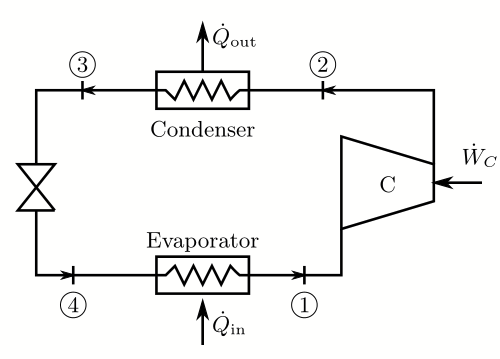

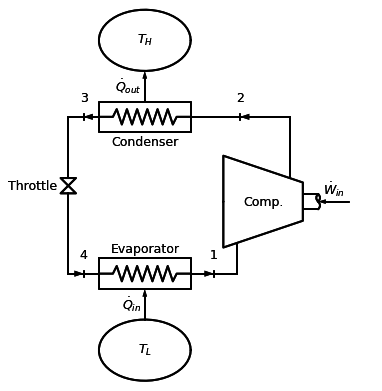

In [7]:
from IPython.display import Image
# import schematics # <- uncomment to regenerate schematic
# schematics.refrigeration_cycle(file='Figures/refrigeration_cycle.png');# <- uncomment to regenerate schematic

Image('Figures/refrigeration_cycle.png')

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=2005363&node=7667507&a=185761075&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [8]:
from kilojoule.templates.default import *

r134a = realfluid.Properties('R134a')

### Given Parameters
We now define variables to hold our known values.

In [10]:
Qdot_in = Quantity(18, 'kW')  # Rate of heat input
T_L = Quantity(-8, 'degC')  # Temperature of refrigerated space
T_H = Quantity(22, 'degC')  # Temperature of surroundings
Delta_T = Quantity(
    10, 'delta_degC')  # Temperature difference in evaporator and condenser

Summary(show=True)

<IPython.core.display.Latex object>

""


### Assumptions
- Ideal work devices
- Saturated vapor at evaporator exit
- Saturated liquid at condenser exit
- Isobaric heat exchangers
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [12]:
x[1] = 1  # Saturated vapor at evaporator exit
x[3] = 0  # Saturated liquid at condenser exit

Summary(show=True)

<IPython.core.display.Latex object>

,$x$ []
1,1
3,0


### (a) Pressures in condenser and evaporator

In [13]:
%%showcalc
"### Evaporator pressure"
"The working fluid temperature must be lower than the refrigerated space"
T[1] = T_L - Delta_T
"The fluid is saturated, so the saturation pressure must be consistent with the saturation temperature"
p[1] = r134a.p(T[1], x[1])
"### Condenser pressure"
"The working fluid temperature must be hotter than the surroundings"
T[3] = T_H + Delta_T
"The fluid is saturated, so the saturation pressure must be consistent with the saturation temperature"
p[3] = r134a.p(T[3], x[3])

### Evaporator pressure
The working fluid temperature must be lower than the refrigerated space
\begin{align}
  {T}_{ 1 } &=   T_{L} - \Delta{}T  \\
    &=  -8\ \mathrm{°C} - 10\ \mathrm{Δ°C} \\
    &= 255.15\ \mathrm{K}
\end{align}

The fluid is saturated, so the saturation pressure must be consistent with the saturation temperature
\begin{align}
  {p}_{ 1 } &=  \mathrm{ \underset{ r134a }{ p } }\left( {T}_{ 1 }, {x}_{ 1 } \right)  = \mathrm{ \underset{ r134a }{ p } }\left( 255.15\ \mathrm{K}, 1 \right) = 144.6\ \mathrm{kPa}
\end{align}

### Condenser pressure
The working fluid temperature must be hotter than the surroundings
\begin{align}
  {T}_{ 3 } &=  T_{H} + \Delta{}T \\
    &= 22\ \mathrm{°C} + 10\ \mathrm{Δ°C}\\
    &= 305.15\ \mathrm{K}
\end{align}

The fluid is saturated, so the saturation pressure must be consistent with the saturation temperature
\begin{align}
  {p}_{ 3 } &=  \mathrm{ \underset{ r134a }{ p } }\left( {T}_{ 3 }, {x}_{ 3 } \right)  = \mathrm{ \underset{ r134a }{ p } }\left( 305.15\ \mathrm{K}, 0 \right) = 815.43\ \mathrm{kPa}
\end{align}



### (b) $COP_R$

In [14]:
%%showcalc
"### 1st Law Analysis"
"#### State 1"
h[1] = r134a.h(T[1], x[1])
s[1] = r134a.s(T[1], x[1])
"#### 1-2) Ideal compression"
p[2] = p[3]
s[2] = s[1]
"#### State 2"
T[2] = r134a.T(p[2], s[2])
h[2] = r134a.h(p[2], s[2])
"#### 2-3) Isobaric heat rejection"
"#### State 3"
T[3] = r134a.T(p[3], x[3])
h[3] = r134a.h(p[3], x[3])
s[3] = r134a.s(p[3], x[3])
"#### 3-4) Isenthalpic expansion"
p[4] = p[1]
h[4] = h[3]
"#### State 4"
T[4] = r134a.T(p[4], h=h[4])
s[4] = r134a.s(p[4], h=h[4])
x[4] = r134a.x(p[4], h=h[4])
"#### COP"
"Desired: Heat Input"
q_in = h[1] - h[4]
"Cost: Net Work"
w_net = h[2] - h[1]
"COP: Desired/Cost"
COP_R = q_in / w_net

### 1st Law Analysis
#### State 1
\begin{align}
  {h}_{ 1 } &=  \mathrm{ \underset{ r134a }{ h } }\left( {T}_{ 1 }, {x}_{ 1 } \right)  = \mathrm{ \underset{ r134a }{ h } }\left( 255.15\ \mathrm{K}, 1 \right) = 387.79\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 1 } &=  \mathrm{ \underset{ r134a }{ s } }\left( {T}_{ 1 }, {x}_{ 1 } \right)  = \mathrm{ \underset{ r134a }{ s } }\left( 255.15\ \mathrm{K}, 1 \right) = 1.7396\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

#### 1-2) Ideal compression
\begin{align}
  {p}_{ 2 } &=  {p}_{ 3 }  = 815.43\ \mathrm{kPa} 
\end{align}

\begin{align}
  {s}_{ 2 } &=  {s}_{ 1 }  = 1.7396\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

#### State 2
\begin{align}
  {T}_{ 2 } &=  \mathrm{ \underset{ r134a }{ T } }\left( {p}_{ 2 }, {s}_{ 2 } \right)  = \mathrm{ \underset{ r134a }{ T } }\left( 815.43\ \mathrm{kPa}, 1.7396\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 312.66\ \mathrm{K}
\end{align}

\begin{align}
  {h}_{ 2 } &=  \mathrm{ \underset{ r134a }{ h } }\left( {p}_{ 2 }, {s}_{ 2 } \right)  = \mathrm{ \underset{ r134a }{ h } }\left( 815.43\ \mathrm{kPa}, 1.7396\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 423.74\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### 2-3) Isobaric heat rejection
#### State 3
\begin{align}
  {T}_{ 3 } &=  \mathrm{ \underset{ r134a }{ T } }\left( {p}_{ 3 }, {x}_{ 3 } \right)  = \mathrm{ \underset{ r134a }{ T } }\left( 815.43\ \mathrm{kPa}, 0 \right) = 305.15\ \mathrm{K}
\end{align}

\begin{align}
  {h}_{ 3 } &=  \mathrm{ \underset{ r134a }{ h } }\left( {p}_{ 3 }, {x}_{ 3 } \right)  = \mathrm{ \underset{ r134a }{ h } }\left( 815.43\ \mathrm{kPa}, 0 \right) = 244.62\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 3 } &=  \mathrm{ \underset{ r134a }{ s } }\left( {p}_{ 3 }, {x}_{ 3 } \right)  = \mathrm{ \underset{ r134a }{ s } }\left( 815.43\ \mathrm{kPa}, 0 \right) = 1.1529\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

#### 3-4) Isenthalpic expansion
\begin{align}
  {p}_{ 4 } &=  {p}_{ 1 }  = 144.6\ \mathrm{kPa} 
\end{align}

\begin{align}
  {h}_{ 4 } &=  {h}_{ 3 }  = 244.62\ \frac{\mathrm{kJ}}{\mathrm{kg}} 
\end{align}

#### State 4
\begin{align}
  {T}_{ 4 } &=  \mathrm{ \underset{ r134a }{ T } }\left( {p}_{ 4 }, \mathrm{ h } = {h}_{ 4 } \right)  = \mathrm{ \underset{ r134a }{ T } }\left( 144.6\ \mathrm{kPa}, \mathrm{ h } = 244.62\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 255.15\ \mathrm{K}
\end{align}

\begin{align}
  {s}_{ 4 } &=  \mathrm{ \underset{ r134a }{ s } }\left( {p}_{ 4 }, \mathrm{ h } = {h}_{ 4 } \right)  = \mathrm{ \underset{ r134a }{ s } }\left( 144.6\ \mathrm{kPa}, \mathrm{ h } = 244.62\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 1.1785\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

\begin{align}
  {x}_{ 4 } &=  \mathrm{ \underset{ r134a }{ x } }\left( {p}_{ 4 }, \mathrm{ h } = {h}_{ 4 } \right)  = \mathrm{ \underset{ r134a }{ x } }\left( 144.6\ \mathrm{kPa}, \mathrm{ h } = 244.62\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 0.32328
\end{align}

#### COP
Desired: Heat Input
\begin{align}
  q_{in} &=   {h}_{ 1 } - {h}_{ 4 }  \\
    &=  387.79\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 244.62\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 143.17\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

Cost: Net Work
\begin{align}
  w_{net} &=   {h}_{ 2 } - {h}_{ 1 }  \\
    &=  423.74\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 387.79\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 35.95\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

COP: Desired/Cost
\begin{align}
  COP_{R} &=  \frac{ q_{in} }{ w_{net} } \\
    &= \frac{ 143.17\ \frac{\mathrm{kJ}}{\mathrm{kg}} }{ 35.95\ \frac{\mathrm{kJ}}{\mathrm{kg}} }\\
    &= 3.9824
\end{align}



### (c) Net Work

In [15]:
%%showcalc
"#### Mass flow rate"
mdot = Qdot_in / q_in
"#### Net work"
Wdot_net = mdot * w_net

#### Mass flow rate
\begin{align}
  \dot{m} &=  \frac{ \dot{Q}_{in} }{ q_{in} } \\
    &= \frac{ 18\ \mathrm{kW} }{ 143.17\ \frac{\mathrm{kJ}}{\mathrm{kg}} }\\
    &= 0.12573\ \frac{\mathrm{kW} \cdot \mathrm{kg}}{\mathrm{kJ}}
\end{align}

#### Net work
\begin{align}
  \dot{W}_{net} &=   \dot{m}  \cdot  w_{net}  \\
    &=  0.12573\ \frac{\mathrm{kW} \cdot \mathrm{kg}}{\mathrm{kJ}}  \cdot  35.95\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 4.5199\ \mathrm{kW}
\end{align}



### (d) Volumetric flow rate entering compressor

In [16]:
%%showcalc
"#### Specific volume entering compressor"
v[1] = r134a.v(T[1], x[1])
"#### Volumetric flow rate"
Vdot[1] = mdot * v[1]

#### Specific volume entering compressor
\begin{align}
  {v}_{ 1 } &=  \mathrm{ \underset{ r134a }{ v } }\left( {T}_{ 1 }, {x}_{ 1 } \right)  = \mathrm{ \underset{ r134a }{ v } }\left( 255.15\ \mathrm{K}, 1 \right) = 0.13592\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

#### Volumetric flow rate
\begin{align}
  {\dot{V}}_{ 1 } &=   \dot{m}  \cdot  {v}_{ 1 }  \\
    &=  0.12573\ \frac{\mathrm{kW} \cdot \mathrm{kg}}{\mathrm{kJ}}  \cdot  0.13592\ \frac{\mathrm{m}^{3}}{\mathrm{kg}} \\
    &= 0.017089\ \frac{\mathrm{m}^{3}}{\mathrm{s}}
\end{align}



### Diagrams

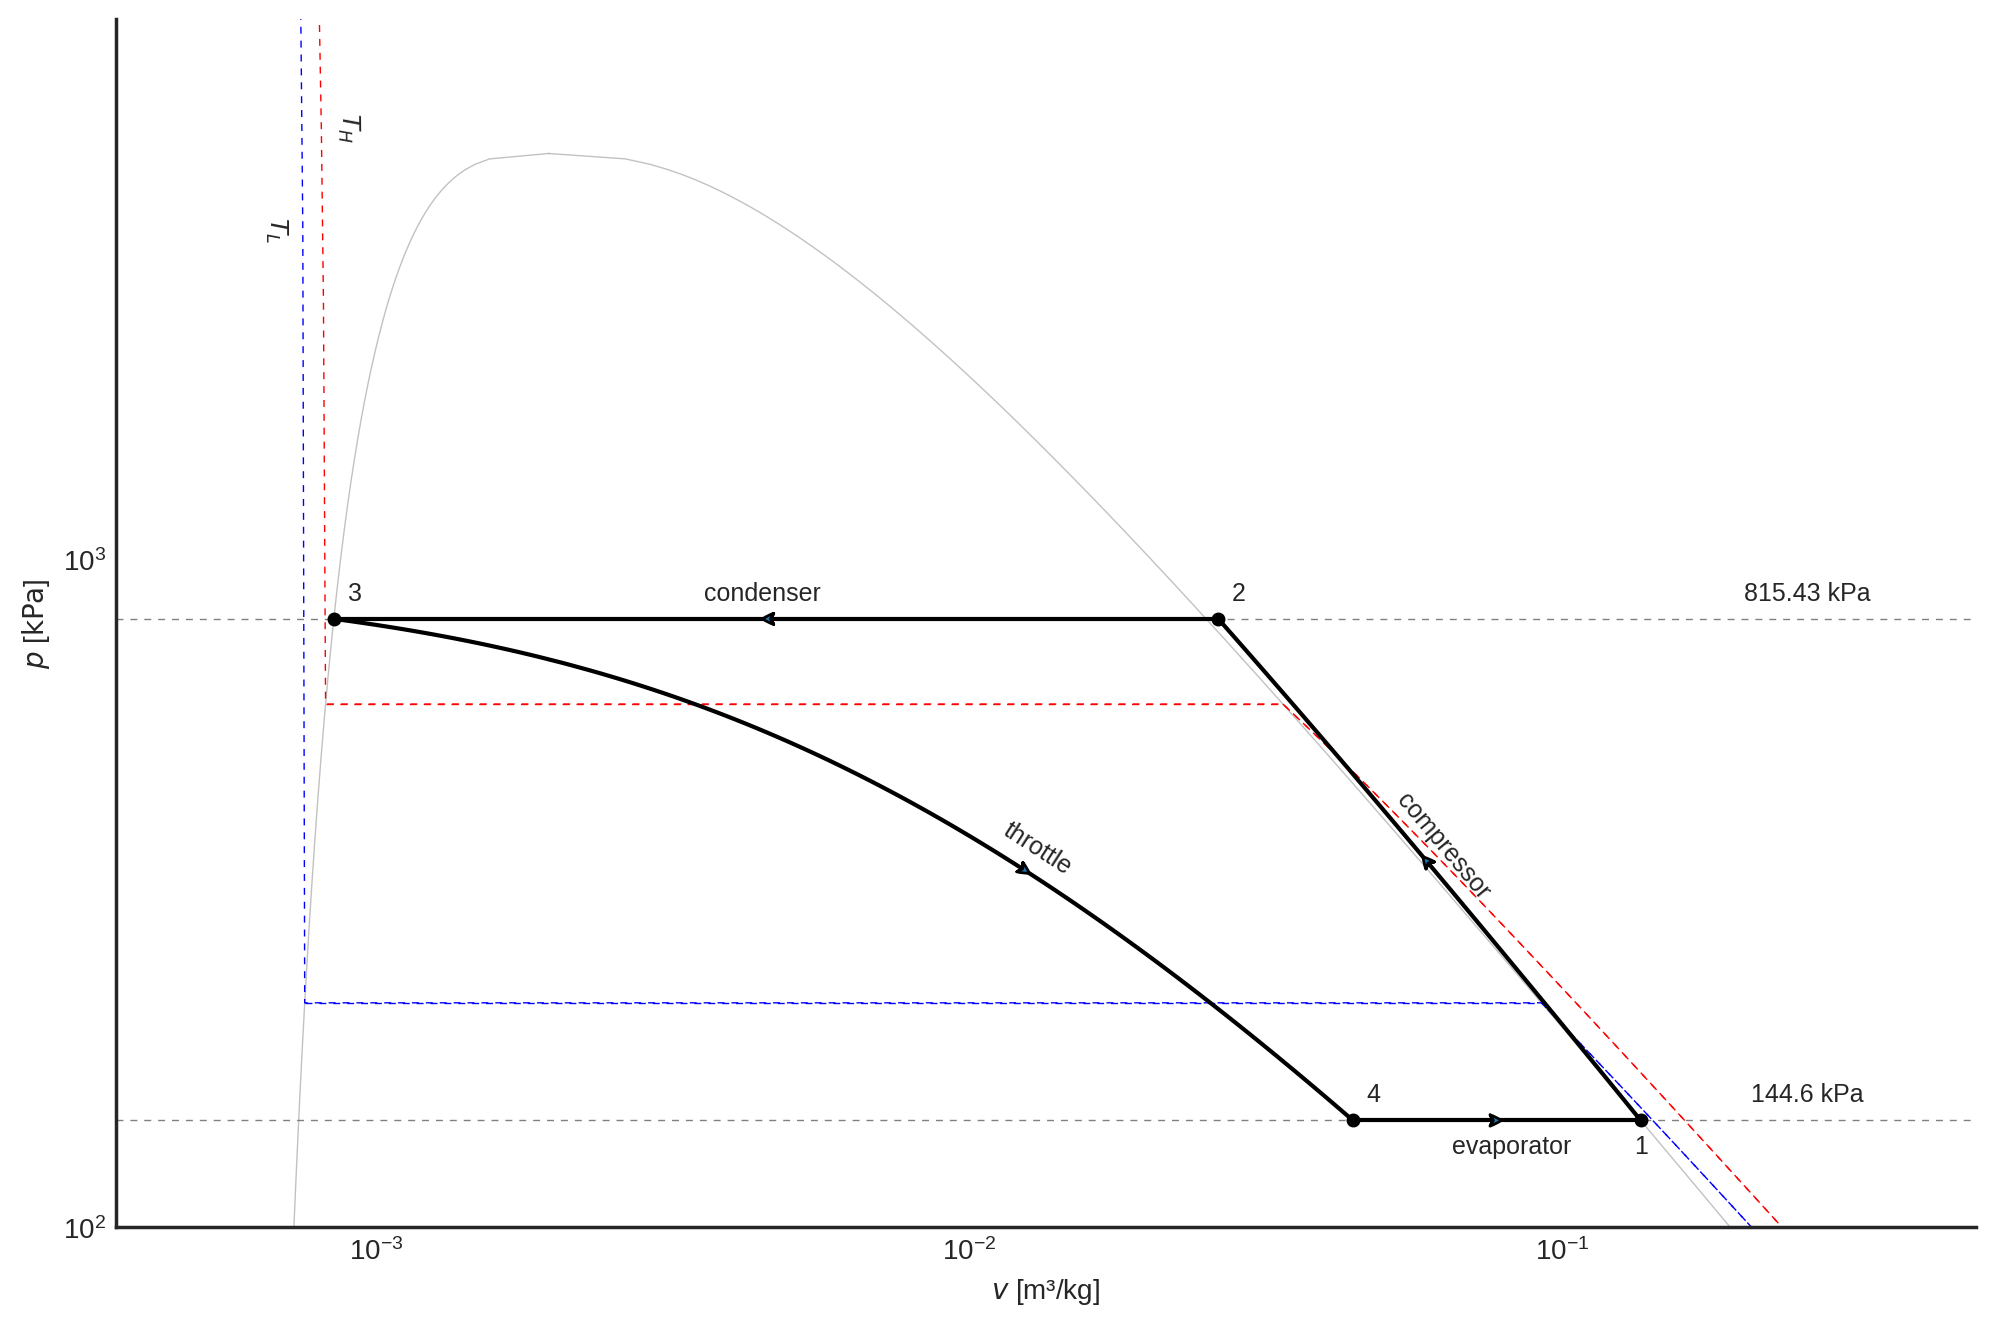

In [17]:
pv = r134a.pv_diagram()
pv.ax.set_ylim(bottom=100)
pv.ax.set_xlim(right=.5)

# Plot Reference Isotherms for refrigerated space and surroundings
# Refrigerated space
pv.plot_isotherm(T_L,
                 color='blue',
                 label='$T_L$',
                 ycoor=4e3,
                 labelprops=dict(va='top'))
# Surrounding temperature
pv.plot_isotherm(T_H, color='red', label='$T_H$', ycoor=4e3)
# High pressure
pv.plot_isobar(p[2], label=f'{p[2]}', pos=.9)
pv.plot_isobar(p[1], label=f'{p[1]}', pos=.9)

for state in [1, 2, 3, 4]:
    v[state] = r134a.v(p[state], h=h[state])

pv.plot_state(states[1], label_loc='south')
pv.plot_state(states[2], label_loc='north east')
pv.plot_state(states[3], label_loc='north east')
pv.plot_state(states[4], label_loc='north east')

pv.plot_process(states[1], states[2], path='isentropic', label='compressor')
pv.plot_process(states[2], states[3], path='isobaric', label='condenser')
pv.plot_process(states[3], states[4], path='isenthalpic', label='throttle')
pv.plot_process(states[4],
                states[1],
                path='isobaric',
                label='evaporator',
                labelprops=dict(va='top', ha='right', pos=.75))

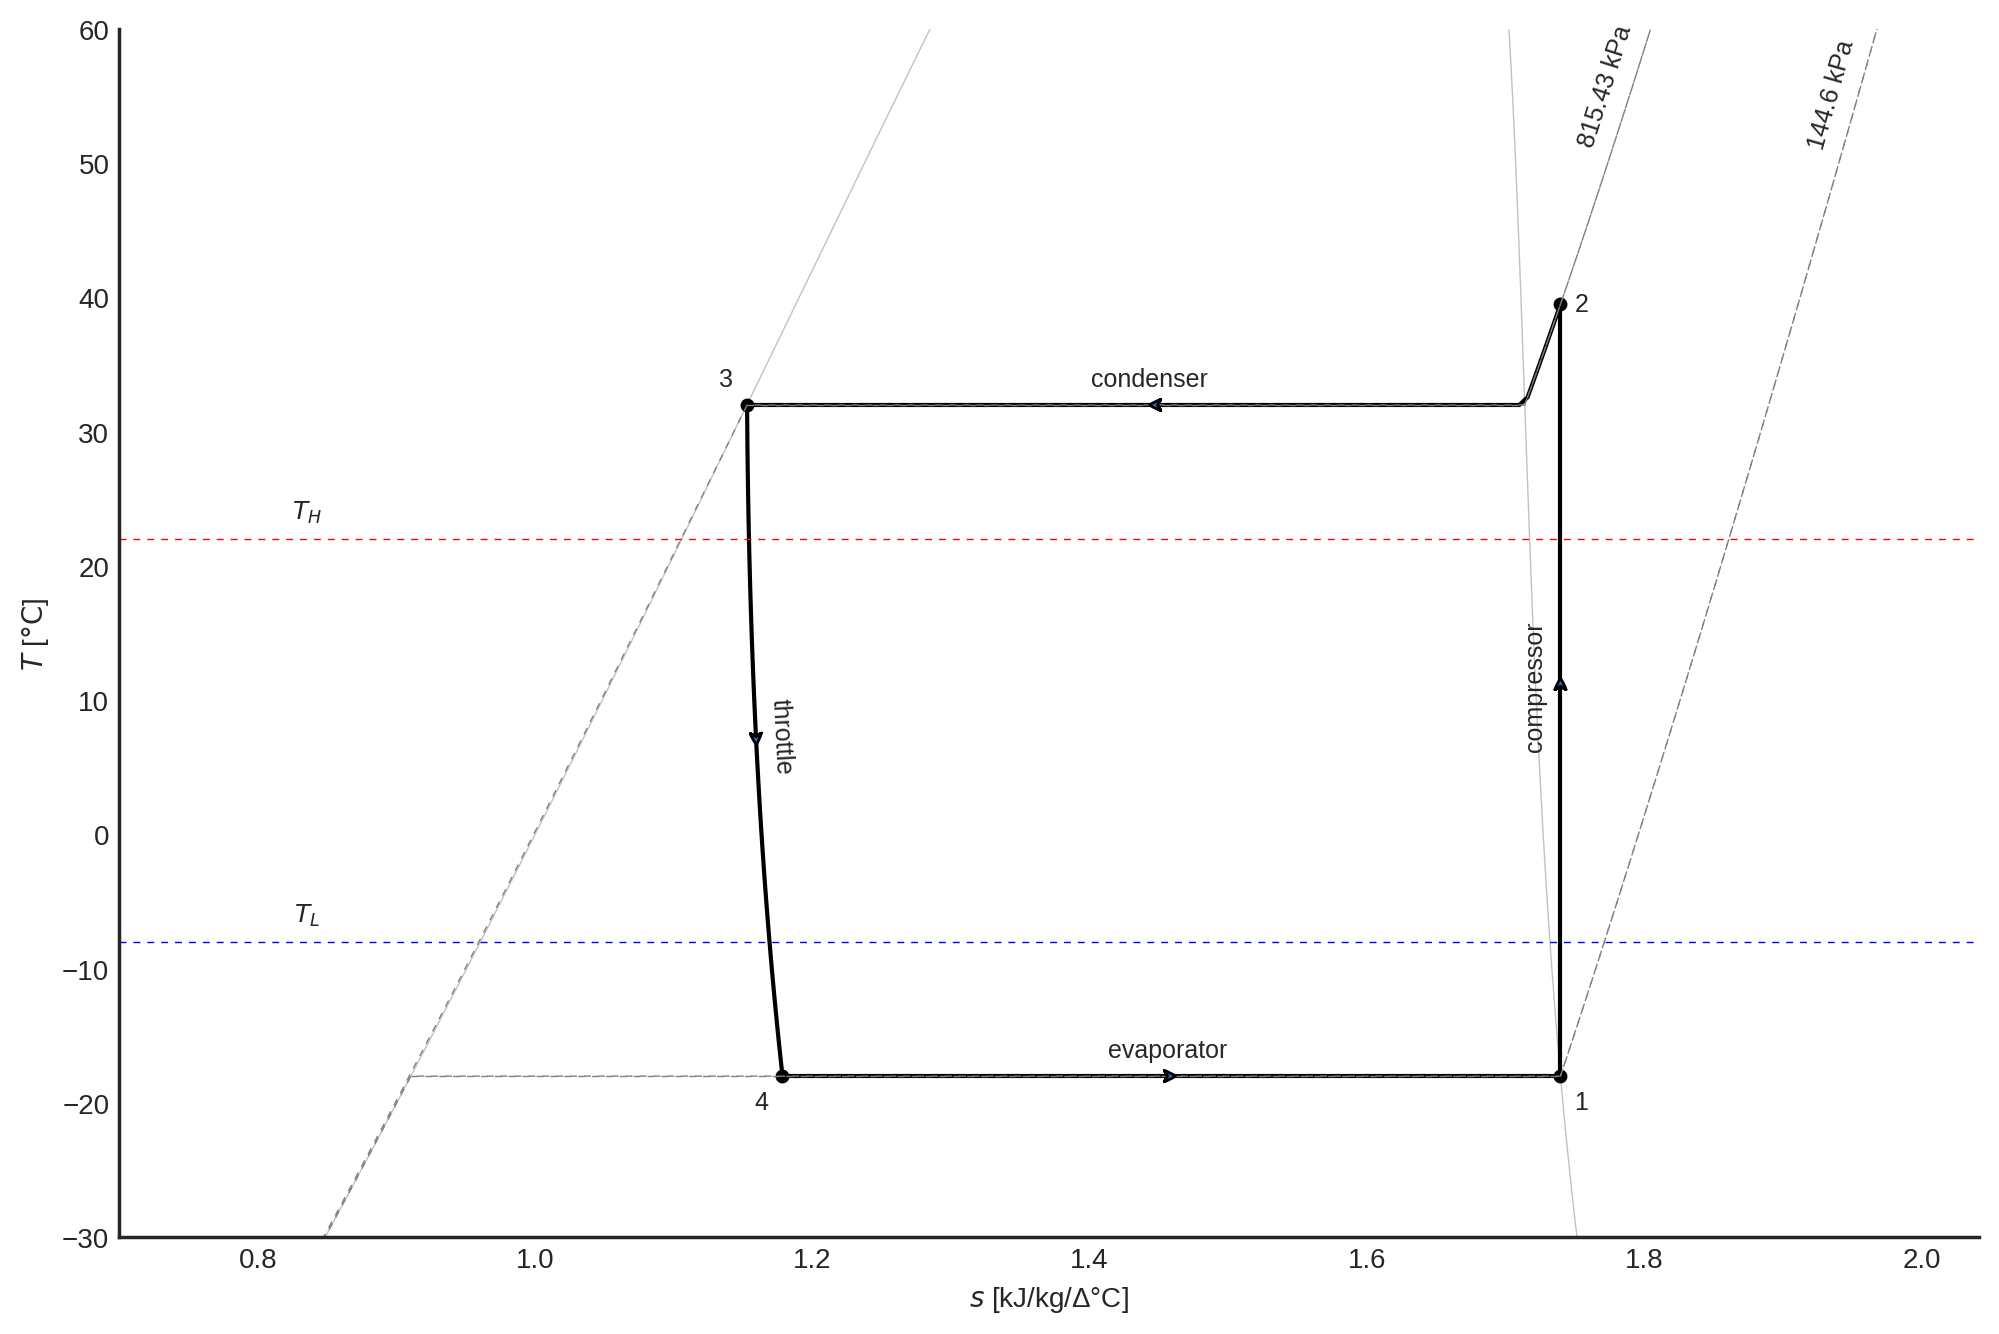

In [18]:
Ts = r134a.Ts_diagram()
Ts.ax.set_ylim(bottom=-30, top=60)
Ts.ax.set_xlim(left=.7)

Ts.plot_state(states[1], label_loc='south east')
Ts.plot_state(states[2], label_loc='east')
Ts.plot_state(states[3], label_loc='north west')
Ts.plot_state(states[4], label_loc='south west')

Ts.plot_process(states[1], states[2], path='isentropic', label='compressor')
Ts.plot_process(states[2], states[3], path='isobaric', label='condenser')
Ts.plot_process(states[3], states[4], path='isenthalpic', label='throttle')
Ts.plot_process(states[4], states[1], path='isobaric', label='evaporator')

# Plot Reference Isotherms for refrigerated space and surroundings
Ts.plot_isotherm(T_L, color='blue', label='$T_L$', pos=0.1)
Ts.plot_isotherm(T_H, color='red', label='$T_H$', pos=0.1)
Ts.plot_isobar(p[2], label=f'{p[2]}', ycoor=55)
Ts.plot_isobar(p[1], label=f'{p[1]}', ycoor=55)

In [20]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 4) Execute this cell to create an HTML file showing only the output 
# 5) Submit the .html file located in the folder with this notebook

# !jupyter nbconvert --to html --no-input --no-prompt "Ex11.1 Ideal Refrigeration.ipynb"